# Projeto de classificação de imagems com serviço Custom Vision do Microsoft Azure

Este código foi criado com base na documentação oficial da Microsoft disponível no artigo **"Início Rápido: Criar um projeto de classificação de imagem com a biblioteca de clientes da Visão Personalizada ou a API REST"**, publicado em 26/04/2022 (https://docs.microsoft.com/pt-br/azure/cognitive-services/custom-vision-service/quickstarts/image-classification?tabs=visual-studio&pivots=programming-language-python#train-the-project) e no **"Exercício – Criar uma solução de classificação de imagens"** (https://docs.microsoft.com/pt-br/learn/modules/classify-images-custom-vision/3-create-image-classifier)

**PRÉ-REQUISITOS:**
- Assinatura do Azure – Criar uma gratuitamente neste link https://azure.microsoft.com/free/cognitive-services/
- Python 3.x , encontrado neste link https://www.python.org/
- A instalação do Python deve incluir o pip (https://pip.pypa.io/en/stable/). Você pode executar `*pip --version*` na linha de comando para verificar se o pip está instalado. Instale a versão mais recente do Python para obter o pip.
- Após obter a assinatura do Azure, crie um recurso da Visão Personalizada (https://portal.azure.com/?microsoft_azure_marketplace_ItemHideKey=microsoft_azure_cognitiveservices_customvision#create/Microsoft.CognitiveServicesCustomVision) no portal do Azure para criar um recurso de treinamento e previsão e obter as chaves e o ponto de extremidade. Aguarde até que ele seja implantado e clique no botão Ir para o recurso.
    - Você precisará da chave e do ponto de extremidade dos recursos criados para conectar seu aplicativo à Visão Personalizada. Você colará as chaves e o ponto de extremidade no código abaixo mais adiante no início rápido.
    - Use o tipo de preço gratuito (F0) para experimentar o serviço e atualizar mais tarde para um nível pago para produção.

**Passo 1:** Instalar biblioteca de clientes Azure para este projeto.

In [ ]:
pip install azure-cognitiveservices-vision-customvision

**Passo 2:** Importe as bibliotecas que serão necessárias.

In [2]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import matplotlib.pyplot as plt
from PIL import Image
import os, time, uuid

**Passo 3:** Crie variáveis para as chaves de assinatura, ID do projeto, nome da iteração implantada e o ponto de extremidade do Azure do recurso.

- Obs.: substitua pelos valores do seu modelo já treinado e implantado (publicado).

In [3]:
ENDPOINT = "COLE_AQUI_O_ENDPOINT_DE_TREINAMENTO_DO_SEU_PROJETO_CUSTOM_VISION"
project_id = "COLE_AQUI_O_ID_DO_SEU_PROJETO_CUSTOM_VISION"
publish_iteration_name = "COLE_AQUI_O_NOME_DA_ITERAÇÃO_DO_SEU_PROJETO_CUSTOM_VISION"
training_key = "COLE_AQUI_A_CHAVE_DE_TREINAMENTO_DO_SEU_PROJETO_CUSTOM_VISION"
prediction_key = "COLE_AQUI_A_CHAVE_DE_PREVISÃO_DO_SEU_PROJETO_CUSTOM_VISION"
prediction_resource_id = "COLE_AQUI_O_ENDEREÇO_DO_RECURSO_DE_PREVISÃO_DO_SEU_PROJETO_CUSTOM_VISION"

**Passo 4:** Autenticação do cliente:

Crie um cliente de treinamento e previsão usando seu ponto de extremidade e suas chaves. Crie objetos ApiKeyServiceClientCredentials com suas chaves e use-os com seu ponto de extremidade para criar um objeto CustomVisionTrainingClient (https://docs.microsoft.com/pt-BR/python/api/azure-cognitiveservices-vision-customvision/azure.cognitiveservices.vision.customvision.training.customvisiontrainingclient) e CustomVisionPredictionClient (https://docs.microsoft.com/pt-BR/python/api/azure-cognitiveservices-vision-customvision/azure.cognitiveservices.vision.customvision.prediction.customvisionpredictionclient).

- Obs.: os passos abaixo são apenas para usar o modelo de previsão a partir de um modelo já treinado.

In [4]:
# Agora há um endpoint treinado que pode ser usado para fazer uma previsão.
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(ENDPOINT, prediction_credentials)

**Passo 5:** Neste código abaixo, informamos uma imagem (no exemplo Abacaxi_Havai.jpg) com endereço local (que no caso inicia na mesma pasta deste projeto e /data/image-classification/test-fruit) para ser analisada e ter sua previsão em relação as tags já definidas no nosso modelo de treinamento, com saída em modo texto.

In [5]:
# Busca imagens na /data/image-classification/test-fruit
base_image_location = os.path.join('data', 'image-classification', 'test-fruit')

with open(os.path.join (base_image_location, "Abacaxi_Havai.jpg"), "rb") as image_contents:
    results = predictor.classify_image(project_id, publish_iteration_name, image_contents.read())

    # Exibe o nome do arquivo que está sendo classificado.
    basename = os.path.basename(str(image_contents))
    file_name = os.path.splitext(basename)[0]
    print("\t" + file_name)
    
    # Exibição dos resultados de previsão para imagem determinada acima.
    for prediction in results.predictions:        
        print("\t" + prediction.tag_name +
              ": {0:.2f}%".format(prediction.probability * 100))

	Abacaxi_Havai
	laranja: 90.26%
	maçã: 6.75%
	banana: 3.00%


**Passo 6:** Já neste segundo código, informamos apenas o endereçamento local (que no caso inicia na mesma pasta deste projeto e /data/image-classification/test-fruit) e software analisa as imagens dentro desta pasta final (/test-fruit), gerando ao final uma plotagem com todas as imagens encontradas e suas respectivas previsões de categorias (relação as tags já definidas no nosso modelo de treinamento).

Classificando imagens de data\image-classification\test-fruit ...


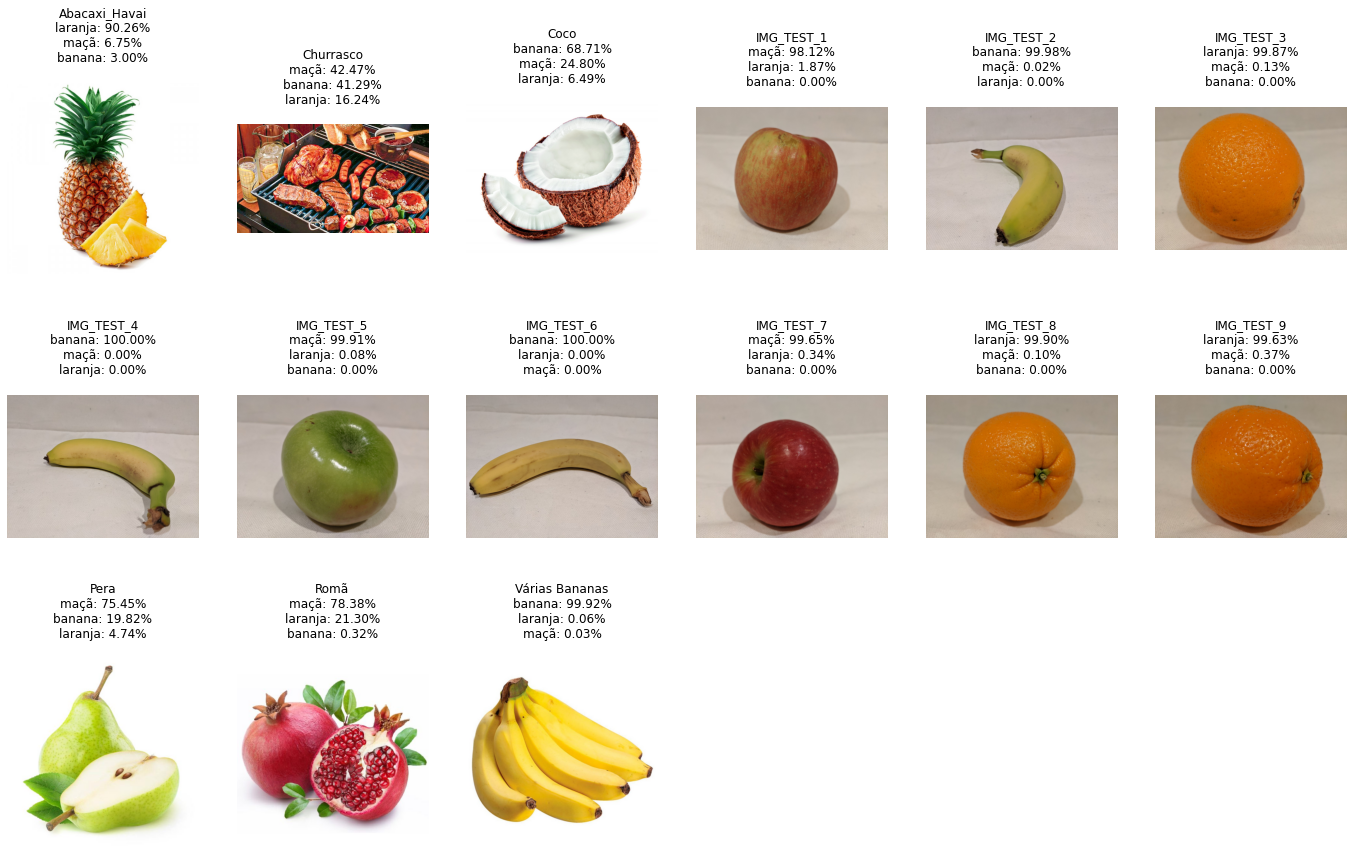

In [6]:
# Busca imagens na pasta /data/image-classification/test-fruit
base_image_location = os.path.join('data', 'image-classification', 'test-fruit')
test_images = os.listdir(base_image_location)

# Cria uma nova figura com resultado final da análise.
fig = plt.figure(figsize=(24, 15))

# Como é um processo mais demorado, convém informar ao usuário que está sendo executado.
print('Classificando imagens de {} ...'.format(base_image_location))

# Abre cada imagem do diretório informado e usa o modelo Custom Vision para classificá-la
for i in range(len(test_images)):
    image_contents = open(os.path.join(base_image_location, test_images[i]), "rb")
    results = predictor.classify_image(project_id, publish_iteration_name, image_contents.read())

    # O resultado exibi a imagens com suas respectivas previções e porcentagens, começando da pontuação mais alta para mais baixa.
    prediction_0 = results.predictions[0].tag_name
    prediction_1 = results.predictions[1].tag_name
    prediction_2 = results.predictions[2].tag_name
    probability_0 = results.predictions[0].probability
    probability_1 = results.predictions[1].probability
    probability_2 = results.predictions[2].probability

    # Exibe o nome do arquivo que está sendo classificado.
    basename = os.path.basename(str(image_contents))
    file_name = os.path.splitext(basename)[0]
    
    # Exibição dos resultados de previsão para imagem determinada acima.
    img = Image.open(os.path.join(base_image_location, test_images[i]))
    a=fig.add_subplot(int(len(test_images)/5), 6,i+1)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(file_name + "\n" + prediction_0 + ": {0:.2f}%".format(probability_0 * 100) + "\n" +
                prediction_1 + ": {0:.2f}%".format(probability_1 * 100) + "\n" + prediction_2 + ": {0:.2f}%".format(probability_2 * 100) + "\n")

   
plt.show()
